# __Feature Selection and Data Splitting Excercise__
- Data yang digunakan adalah cancer_data.csv. keterangan dataset bisa dibaca di Breast Cances Wisconsin (Diagnostic) Data Set
- Jalankan feature Selection dan beri kesimpulan feature apa saja yang penting bagi target (ganas/jinaknya cancer)
- Jalankan splitting data dengan komposisi 85% data train dan 15% data test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv('cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

## Encoding The Diagnosis Feature
Since the Diagnosis feature is a categorical data, it is better for us to encode the value into numbers using Label Encoder from sklearn. Lets go!

In [7]:
from sklearn.preprocessing import LabelEncoder
df['diagnosis encoded'] = LabelEncoder().fit_transform(df['diagnosis'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

## Task 1 : Feature Selection

In [9]:
x = df.iloc[:, 0:31].drop('diagnosis', axis=1)
y = df.iloc[:, 0]
y_encoded = df.iloc[:, -1]

### Method 1 : Univariate Selection

In [50]:
bestfeatures = SelectKBest(score_func = chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10,'Score'))

              Specs          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


### Method 2 : Feature Importance

[0.06194895 0.0156244  0.08090385 0.07810121 0.01116405 0.01514185
 0.06982023 0.08283323 0.00730668 0.00570764 0.01608925 0.00573064
 0.01436912 0.03945735 0.00585062 0.00712126 0.00870486 0.00813274
 0.00562673 0.0057768  0.06076421 0.02952976 0.08202341 0.07718145
 0.02001444 0.03423559 0.03859911 0.08613919 0.01582576 0.01027559]


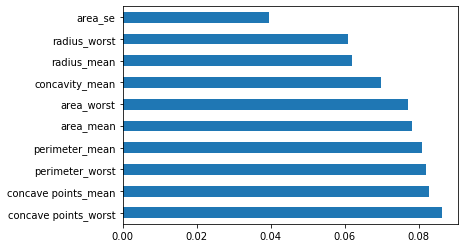

In [51]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


### Method 3 : Correlation Heatmap

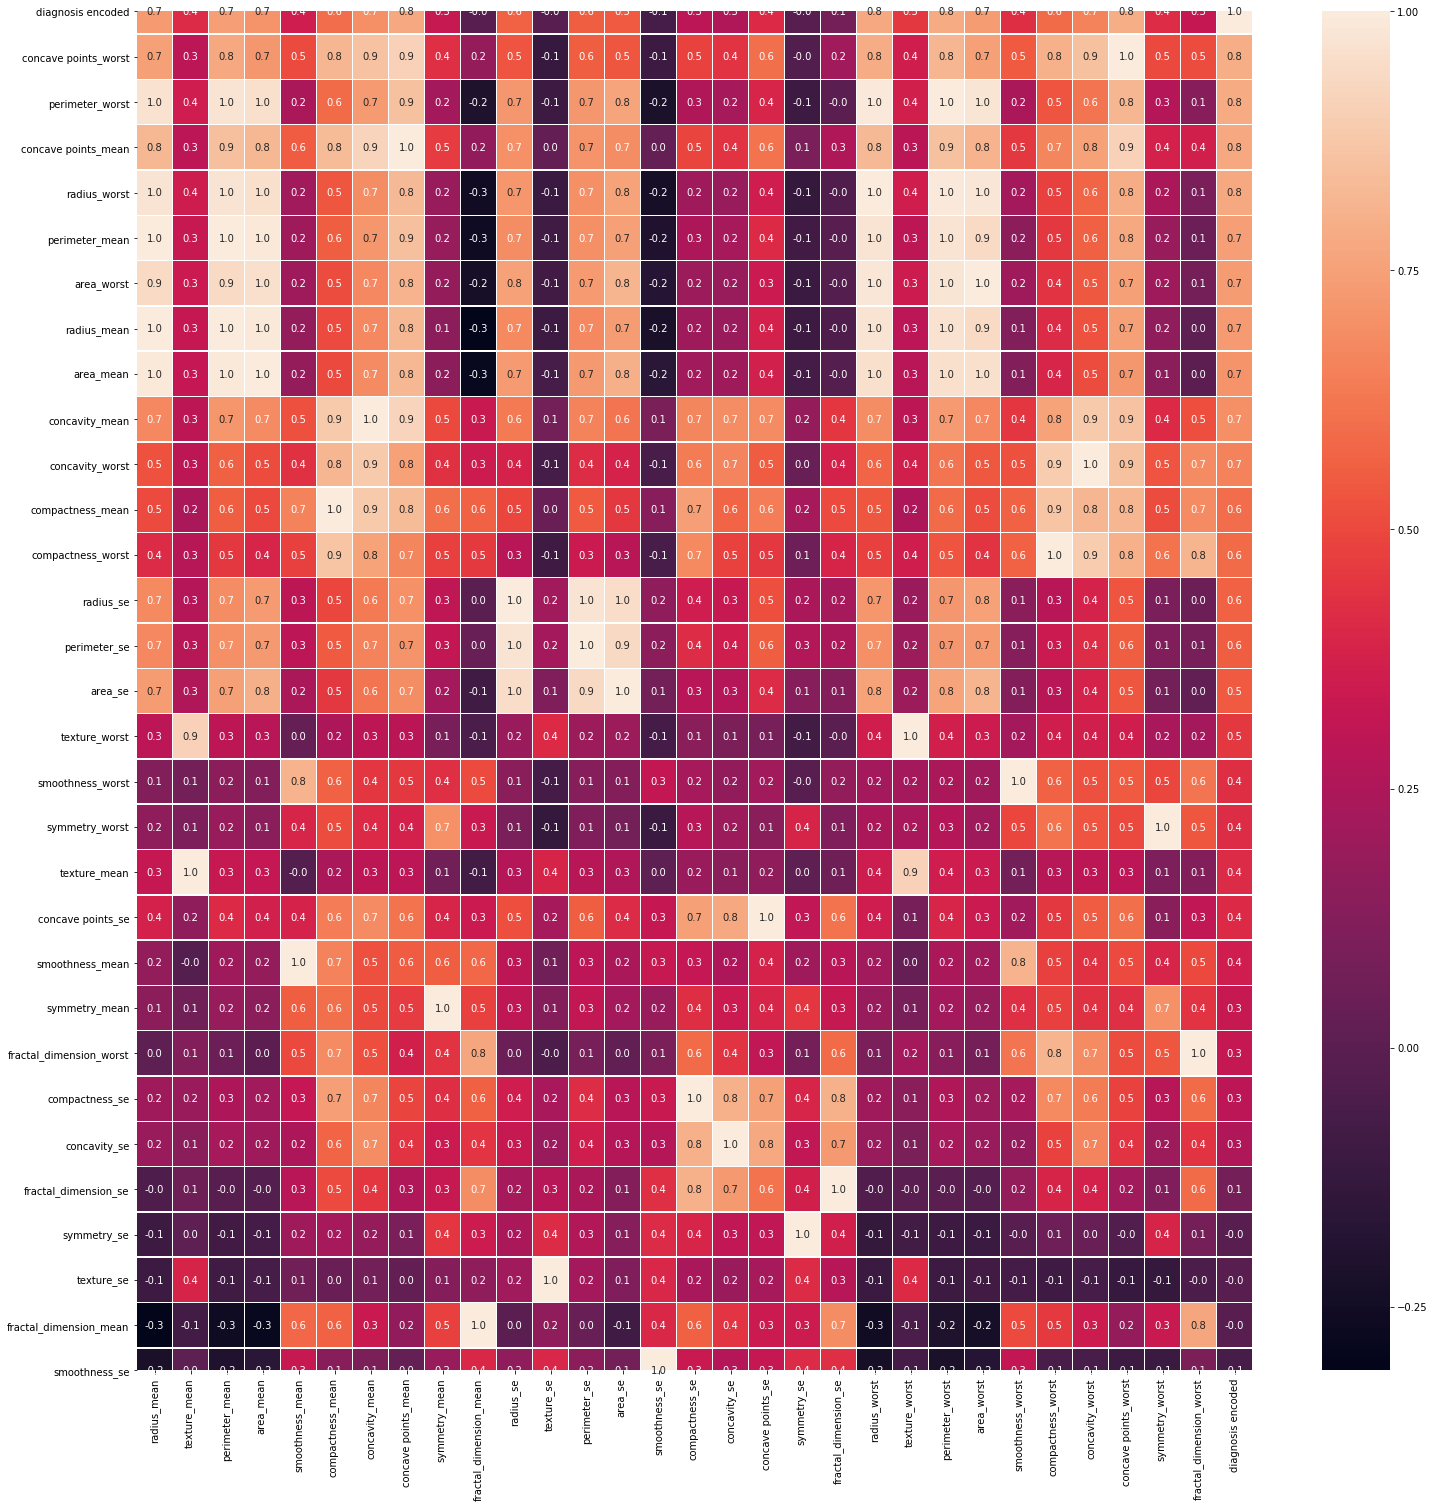

In [59]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))

g = sns.heatmap(df[top_corr_features].corr().sort_values(by='diagnosis encoded', ascending=False),
                annot=True, linewidths=.5, fmt= '.1f')

According to three methods above, there is a slight differences between the results of each methods. But, the result of method 2 (feature importance) and method 3 (correlation heatmap) is very similar. In facts, their top 10 feature is the same, just different orderly. Thats why i think 10 most relevant feature to use is those feature that are showed in both 2nd and 3rd methods which is :

In [87]:
no = 1
print('Top 10 Most Relevant Features for Diagnosis : ')
for i in df[top_corr_features].corr().sort_values(by='diagnosis encoded', ascending=False).index.values[:10]:
    print('{}. {}'.format(no, i))
    no+= 1


Top 10 Most Relevant Features for Diagnosis : 
1. diagnosis encoded
2. concave points_worst
3. perimeter_worst
4. concave points_mean
5. radius_worst
6. perimeter_mean
7. area_worst
8. radius_mean
9. area_mean
10. concavity_mean


## Task 2 : Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

In [43]:
xTrain, xTest, yTrain, yTest = train_test_split(
    df[df.columns[1 : -2].values], df['diagnosis encoded'], 
    test_size=.15)

In [46]:
xTrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
526,13.460,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.031520,0.1723,0.06317,...,0.001787,15.350,25.16,101.90,719.8,0.1624,0.31240,0.26540,0.14270,0.3518
425,10.030,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,0.1630,0.06439,...,0.002411,11.110,28.94,69.92,376.3,0.1126,0.07094,0.01235,0.02579,0.2349
465,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,0.06432,...,0.008133,15.440,25.50,115.00,733.5,0.1201,0.56460,0.65560,0.13570,0.2845
59,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,...,0.002788,9.507,15.40,59.90,274.9,0.1733,0.12390,0.11680,0.04419,0.3220
485,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.048460,0.2082,0.07325,...,0.009627,13.780,21.03,97.82,580.6,0.1175,0.40610,0.48960,0.13420,0.3231


In [47]:
xTest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.023070,0.1846,0.05325,...,0.001700,19.18,26.56,127.30,1084.0,0.1009,0.2920,0.24770,0.08737,0.4677
252,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.097400,0.1733,0.06697,...,0.007259,25.28,25.59,159.80,1933.0,0.1710,0.5955,0.84890,0.25070,0.2749
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,0.002360,11.95,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.058140,0.1621,0.05425,...,0.001087,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206
301,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.030990,0.1781,0.06249,...,0.004651,13.46,23.07,88.13,551.3,0.1050,0.2158,0.19040,0.07625,0.2685


In [48]:
yTrain.head()

526    0
425    0
465    0
59     0
485    0
Name: diagnosis encoded, dtype: int32

In [49]:
yTest.head()

489    1
252    1
144    0
186    1
301    0
Name: diagnosis encoded, dtype: int32